<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_9_Image_Classification_(CIFAR_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model A - Basic CNN Model

##1. Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense, Flatten, Dropout, Activation, MaxPool2D, BatchNormalization
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
# tensorflow.keras.image.preprocessing.ImageDataGenerator

##2. Import Dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


<function matplotlib.pyplot.show(*args, **kw)>

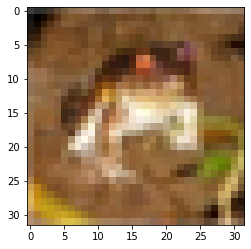

In [ ]:
plt.imshow(X_train[0])
plt.show

##3. Data Understanding

In [ ]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train.std(), X_test.std()

(64.1500758911213, 64.06097012299574)

Apply Normalization for better learning

In [ ]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_train_norm = X_train/255
X_test_norm = X_test/255

In [ ]:
X_train_norm.std(), X_test_norm.std()

(0.25156892506322026, 0.2512194906784146)

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

##4. Model Building

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape = (32,32,3),filters = 96,kernel_size = 11,strides = 4,padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2),padding ='same'))
model.add(Conv2D(filters = 256,kernel_size = 5,strides = 1,padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2),padding ='same'))

model.add(Conv2D(filters = 384,kernel_size = 3,strides = 1,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 384,kernel_size = 3,strides = 1,padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 256,kernel_size = 3,strides = 1,padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2),padding ='same'))

model.add(Flatten())
model.add(Dense(units = 4096, activation = 'tanh'))
model.add(Dense(units = 4096, activation = 'tanh'))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 384)         1

Model Compilation

In [ ]:
model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics='categorical_accuracy')

##5. Model Training

In [ ]:
model_training = model.fit(x=X_train_norm,y=y_train_encoded,batch_size = 32,epochs = 25, validation_data=(X_test_norm,y_test_encoded),verbose = 2)

Epoch 1/25
1563/1563 - 24s - loss: 2.2187 - categorical_accuracy: 0.1506 - val_loss: 2.0142 - val_categorical_accuracy: 0.2162 - 24s/epoch - 15ms/step
Epoch 2/25
1563/1563 - 17s - loss: 1.8695 - categorical_accuracy: 0.2967 - val_loss: 2.0437 - val_categorical_accuracy: 0.2455 - 17s/epoch - 11ms/step
Epoch 3/25
1563/1563 - 17s - loss: 1.5972 - categorical_accuracy: 0.4115 - val_loss: 1.4501 - val_categorical_accuracy: 0.4669 - 17s/epoch - 11ms/step
Epoch 4/25
1563/1563 - 16s - loss: 1.4473 - categorical_accuracy: 0.4680 - val_loss: 1.4362 - val_categorical_accuracy: 0.4794 - 16s/epoch - 10ms/step
Epoch 5/25
1563/1563 - 17s - loss: 1.3449 - categorical_accuracy: 0.5138 - val_loss: 1.2821 - val_categorical_accuracy: 0.5344 - 17s/epoch - 11ms/step
Epoch 6/25
1563/1563 - 16s - loss: 1.2574 - categorical_accuracy: 0.5431 - val_loss: 1.2209 - val_categorical_accuracy: 0.5539 - 16s/epoch - 10ms/step
Epoch 7/25
1563/1563 - 16s - loss: 1.1818 - categorical_accuracy: 0.5756 - val_loss: 1.3533 - 

Model Evaluation

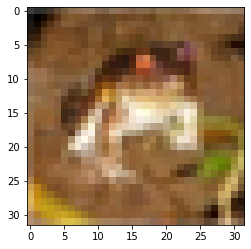

In [ ]:
plt.imshow(X_train_norm[0])

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = np.reshape(a= y_train, newshape = -1,)
y_test = np.reshape(a=y_test,newshape = -1,)
y_train.shape,y_test.shape

((50000,), (10000,))

In [ ]:
class_names[y_train[0]]

'frog'

##Model Prediction/ Testing

In [ ]:
# y_pred_test = model.predict(X_test_norm)
# y_pred_train = model.predict(X_train_norm)

In [ ]:
prediction = model.predict(X_test_norm)
prediction
print(np.argmax(prediction[29]))

313/313 [==============================] - 1s 4ms/step
6


In [ ]:
y_test[29]

6

In [ ]:
evaluation_score = model.evaluate(x=X_test_norm,y=y_test_encoded)

313/313 [==============================] - 2s 5ms/step - loss: 1.7072 - categorical_accuracy: 0.6076


In [ ]:
evaluation_score

[1.7071958780288696, 0.6075999736785889]

In [ ]:
print('Loss        =', evaluation_score[0])
print('Accuracy    =', evaluation_score[1])

Loss        = 1.7071958780288696
Accuracy    = 0.6075999736785889


In [ ]:
model_loss = evaluation_score[0]
model_accuracy = evaluation_score[1]

##Model Performance

Model Accuracy

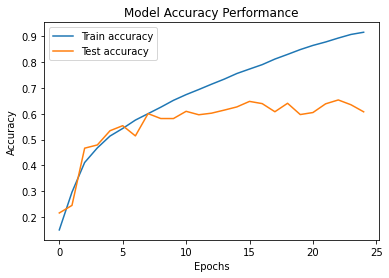

In [ ]:
plt.plot(model_training.history['categorical_accuracy'],label = 'Train accuracy')

plt.plot(model_training.history['val_categorical_accuracy'],label='Test accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Performance')
plt.legend()
plt.show()

Model Loss

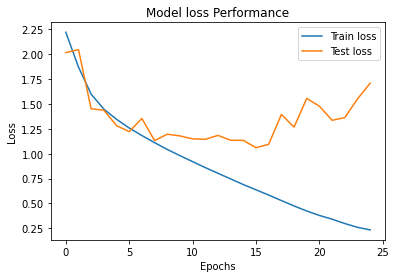

In [ ]:
plt.plot(model_training.history['loss'],label = 'Train loss')

plt.plot(model_training.history['val_loss'],label='Test loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss Performance')
plt.legend()
plt.show()

#Model B - CNN Model using Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2)

datagen.fit(X_train_norm)

##5. Model Training

In [ ]:
Agumented_model_training = model.fit(datagen.flow(X_train_norm, y_train_encoded, batch_size=32, subset='training'),
                                              validation_data=datagen.flow(X_train_norm, y_train_encoded,batch_size=8, subset='validation'),
                                              epochs=25,verbose = 2)

Epoch 1/25
1250/1250 - 46s - loss: 3.2409 - categorical_accuracy: 0.3959 - val_loss: 1.3966 - val_categorical_accuracy: 0.5080 - 46s/epoch - 36ms/step
Epoch 2/25
1250/1250 - 46s - loss: 1.3447 - categorical_accuracy: 0.5210 - val_loss: 1.2935 - val_categorical_accuracy: 0.5530 - 46s/epoch - 37ms/step
Epoch 3/25
1250/1250 - 45s - loss: 1.2772 - categorical_accuracy: 0.5471 - val_loss: 1.2417 - val_categorical_accuracy: 0.5543 - 45s/epoch - 36ms/step
Epoch 4/25
1250/1250 - 49s - loss: 1.2273 - categorical_accuracy: 0.5663 - val_loss: 1.2044 - val_categorical_accuracy: 0.5723 - 49s/epoch - 39ms/step
Epoch 5/25
1250/1250 - 47s - loss: 1.1936 - categorical_accuracy: 0.5774 - val_loss: 1.1655 - val_categorical_accuracy: 0.5856 - 47s/epoch - 38ms/step
Epoch 6/25
1250/1250 - 45s - loss: 1.1669 - categorical_accuracy: 0.5867 - val_loss: 1.1467 - val_categorical_accuracy: 0.5967 - 45s/epoch - 36ms/step
Epoch 7/25
1250/1250 - 45s - loss: 1.1362 - categorical_accuracy: 0.5983 - val_loss: 1.1495 - 

Model Evaluation

<function matplotlib.pyplot.show(*args, **kw)>

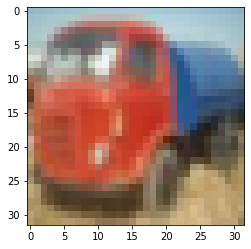

In [ ]:
plt.imshow(X_train_norm[102])
plt.show

In [ ]:
y_train[0]

6

In [ ]:
# y_pred_test = model.predict(X_test)
# y_pred_train = model.predict(X_train)

## 7. Model Prediction

In [ ]:
Agumented_prediction = model.predict(X_test_norm)    #X_test_norm value has been updated as we have used ImageDataGenerator
Agumented_prediction
print(np.argmax(prediction[29]))

313/313 [==============================] - 1s 4ms/step
6


In [ ]:
y_test[29]

6

In [ ]:
Agumented_evaluation_score = model.evaluate(x=X_test_norm,y=y_test_encoded)

313/313 [==============================] - 2s 5ms/step - loss: 2.3635 - categorical_accuracy: 0.3957


In [ ]:
Agumented_evaluation_score

[2.363480567932129, 0.39570000767707825]

In [ ]:
print('Loss        =', Agumented_evaluation_score[0])
print('Accuracy    =', Agumented_evaluation_score[1])

Loss        = 2.363480567932129
Accuracy    = 0.39570000767707825


In [ ]:
Agumented_model_loss = Agumented_evaluation_score[0]
Agumented_model_accuracy = Agumented_evaluation_score[1]

## 8. Model Performance

Model Accuracy

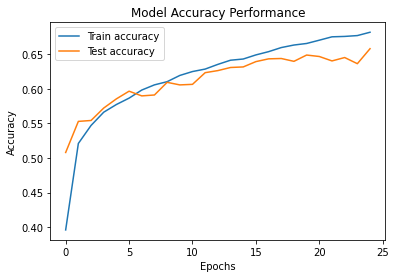

In [ ]:
plt.plot(Agumented_model_training.history['categorical_accuracy'],label = 'Train accuracy')

plt.plot(Agumented_model_training.history['val_categorical_accuracy'],label='Test accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Performance')
plt.legend()
plt.show()

Model Loss

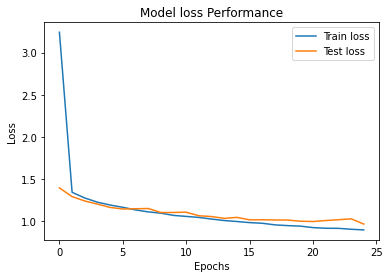

In [ ]:
plt.plot(Agumented_model_training.history['loss'],label = 'Train loss')

plt.plot(Agumented_model_training.history['val_loss'],label='Test loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss Performance')
plt.legend()
plt.show()

#Model C - CNN Model using Dropout, Data Augmentation and Batch Normalization

##Model Building

In [ ]:
enhanced_model = Sequential()
enhanced_model.add(Conv2D(input_shape = (32,32,3),filters = 96,kernel_size = 11,strides = 4,padding = 'same',activation = 'relu'))
enhanced_model.add(BatchNormalization())
enhanced_model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2),padding ='same'))
enhanced_model.add(Conv2D(filters = 256,kernel_size = 5,strides = 1,padding = 'same',activation = 'relu'))
enhanced_model.add(BatchNormalization())
enhanced_model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2),padding ='same'))

enhanced_model.add(Conv2D(filters = 384,kernel_size = 3,strides = 1,padding = 'same',activation = 'relu'))
enhanced_model.add(BatchNormalization())
enhanced_model.add(Conv2D(filters = 384,kernel_size = 3,strides = 1,padding = 'same',activation = 'relu'))
enhanced_model.add(BatchNormalization())
enhanced_model.add(Conv2D(filters = 256,kernel_size = 3,strides = 1,padding = 'same',activation = 'relu'))
enhanced_model.add(BatchNormalization())
enhanced_model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2),padding ='same'))

enhanced_model.add(Flatten())
enhanced_model.add(Dense(units = 4096, activation = 'tanh'))
enhanced_model.add(Dropout(rate = 0.30))
enhanced_model.add(Dense(units = 4096, activation = 'tanh'))
enhanced_model.add(Dropout(rate = 0.30))
enhanced_model.add(Dense(units = 10, activation = 'softmax'))
enhanced_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1024      
 hNormalization)                                                 
                                                      

Model Compilation

In [ ]:
enhanced_model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics='categorical_accuracy')

##5. Model Training

In [ ]:
enhanced_model_training = enhanced_model.fit(datagen.flow(X_train_norm, y_train_encoded, batch_size=32, subset='training'),
                                              validation_data=datagen.flow(X_train_norm, y_train_encoded,batch_size=8, subset='validation'),
                                              epochs=25,verbose = 2)

Epoch 1/25
1250/1250 - 47s - loss: 1.8992 - categorical_accuracy: 0.3237 - val_loss: 1.5743 - val_categorical_accuracy: 0.4193 - 47s/epoch - 37ms/step
Epoch 2/25
1250/1250 - 45s - loss: 1.6226 - categorical_accuracy: 0.4161 - val_loss: 1.4851 - val_categorical_accuracy: 0.4636 - 45s/epoch - 36ms/step
Epoch 3/25
1250/1250 - 47s - loss: 1.4994 - categorical_accuracy: 0.4590 - val_loss: 1.4166 - val_categorical_accuracy: 0.4955 - 47s/epoch - 38ms/step
Epoch 4/25
1250/1250 - 45s - loss: 1.4197 - categorical_accuracy: 0.4947 - val_loss: 1.3762 - val_categorical_accuracy: 0.5083 - 45s/epoch - 36ms/step
Epoch 5/25
1250/1250 - 45s - loss: 1.3634 - categorical_accuracy: 0.5102 - val_loss: 1.3167 - val_categorical_accuracy: 0.5267 - 45s/epoch - 36ms/step
Epoch 6/25
1250/1250 - 46s - loss: 1.3087 - categorical_accuracy: 0.5338 - val_loss: 1.3148 - val_categorical_accuracy: 0.5350 - 46s/epoch - 37ms/step
Epoch 7/25
1250/1250 - 48s - loss: 1.2688 - categorical_accuracy: 0.5474 - val_loss: 1.2076 - 

##Model Prediction/ Testing

In [ ]:
enhanced_model_prediction = enhanced_model.predict(X_test_norm)
enhanced_model_prediction
print(np.argmax(prediction[29]))

313/313 [==============================] - 2s 4ms/step
6


In [ ]:
y_test[29]

6

In [ ]:
enhanced_model_evaluation_score = enhanced_model.evaluate(x=X_test_norm,y=y_test_encoded)

313/313 [==============================] - 3s 8ms/step - loss: 4.4545 - categorical_accuracy: 0.1200


In [ ]:
enhanced_model_evaluation_score

[4.454463481903076, 0.11999999731779099]

In [ ]:
print('Loss        =', enhanced_model_evaluation_score[0])
print('Accuracy    =', enhanced_model_evaluation_score[1])

Loss        = 4.454463481903076
Accuracy    = 0.11999999731779099


In [ ]:
enhanced_model_model_loss = enhanced_model_evaluation_score[0]
enhanced_model_model_accuracy = enhanced_model_evaluation_score[1]

##Model Performance

Model Accuracy

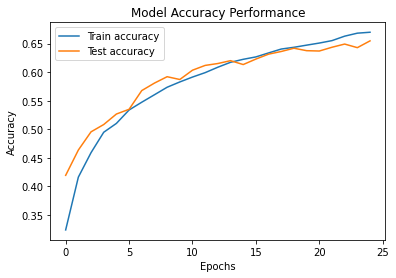

In [ ]:
plt.plot(enhanced_model_training.history['categorical_accuracy'],label = 'Train accuracy')

plt.plot(enhanced_model_training.history['val_categorical_accuracy'],label='Test accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Performance')
plt.legend()
plt.show()

Model Loss

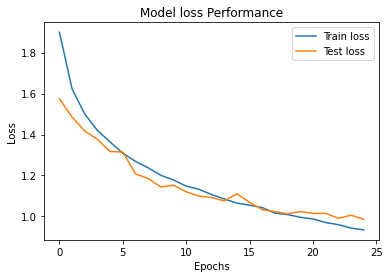

In [ ]:
plt.plot(enhanced_model_training.history['loss'],label = 'Train loss')

plt.plot(enhanced_model_training.history['val_loss'],label='Test loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss Performance')
plt.legend()
plt.show()

#Conclusion

 - It is observed that with basic model the accuracy was okay but when we increased the image observations using image agumentation technique overall performance was reduced. Lastly, even when we apply dropout and batch normalization we did not get the best results. 